<a href="https://colab.research.google.com/github/ShawnLiu119/Home_Loan_Approval_Classification/blob/main/Home_loan_approval_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Loan Approval Classification

### test for modular code

This code will use Home Loan Approval Dataset (https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval/data) from Kaggle to walk through end-to-end model development, from data wrangling to feature importance output and prediction

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
path = "/content/drive/MyDrive/kaggle_data/home_loan"
file_train = "loan_sanction_train.csv"
file_test = "loan_sanction_test.csv"

df = pd.read_csv(os.path.join(path, file_train))

### data wrangling & EDA

In [5]:
df.head()

#identify target variable is Loan_status

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Column Type -- Category/Num

In [8]:
#change the object columns into strings
str_cols = df.select_dtypes(include='object').columns
print(str_cols)
df[str_cols] = df[str_cols].astype('string')

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [9]:
#filter out num_cols
all_cols = df.columns
target = ['HeartDisease']
num_cols = set(all_cols) - set(str_cols) - set(target)

print(num_cols)

{'ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome'}


### EDA


### Correlation Matrix

In [11]:
import plotly.express as px
px.imshow(df.corr(numeric_only = True),title="Correlation Plot of the Loan Amount")

#need to include numeric_only set as true, otherwise error
#Lighter shades represents positive correlation
#Darker shades represents negative correlation

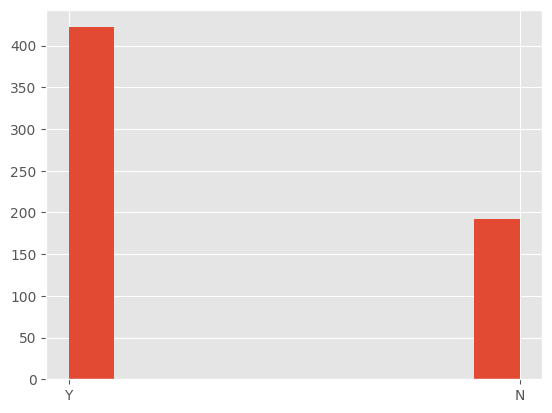

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['Loan_Status']) #target variable
plt.show()

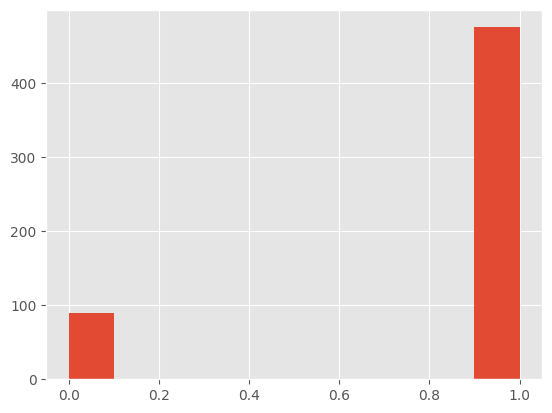

In [39]:
import matplotlib.pyplot as plt
plt.hist(df['Credit_History']) #target variable
plt.show()

[]

<Figure size 1500x1000 with 0 Axes>

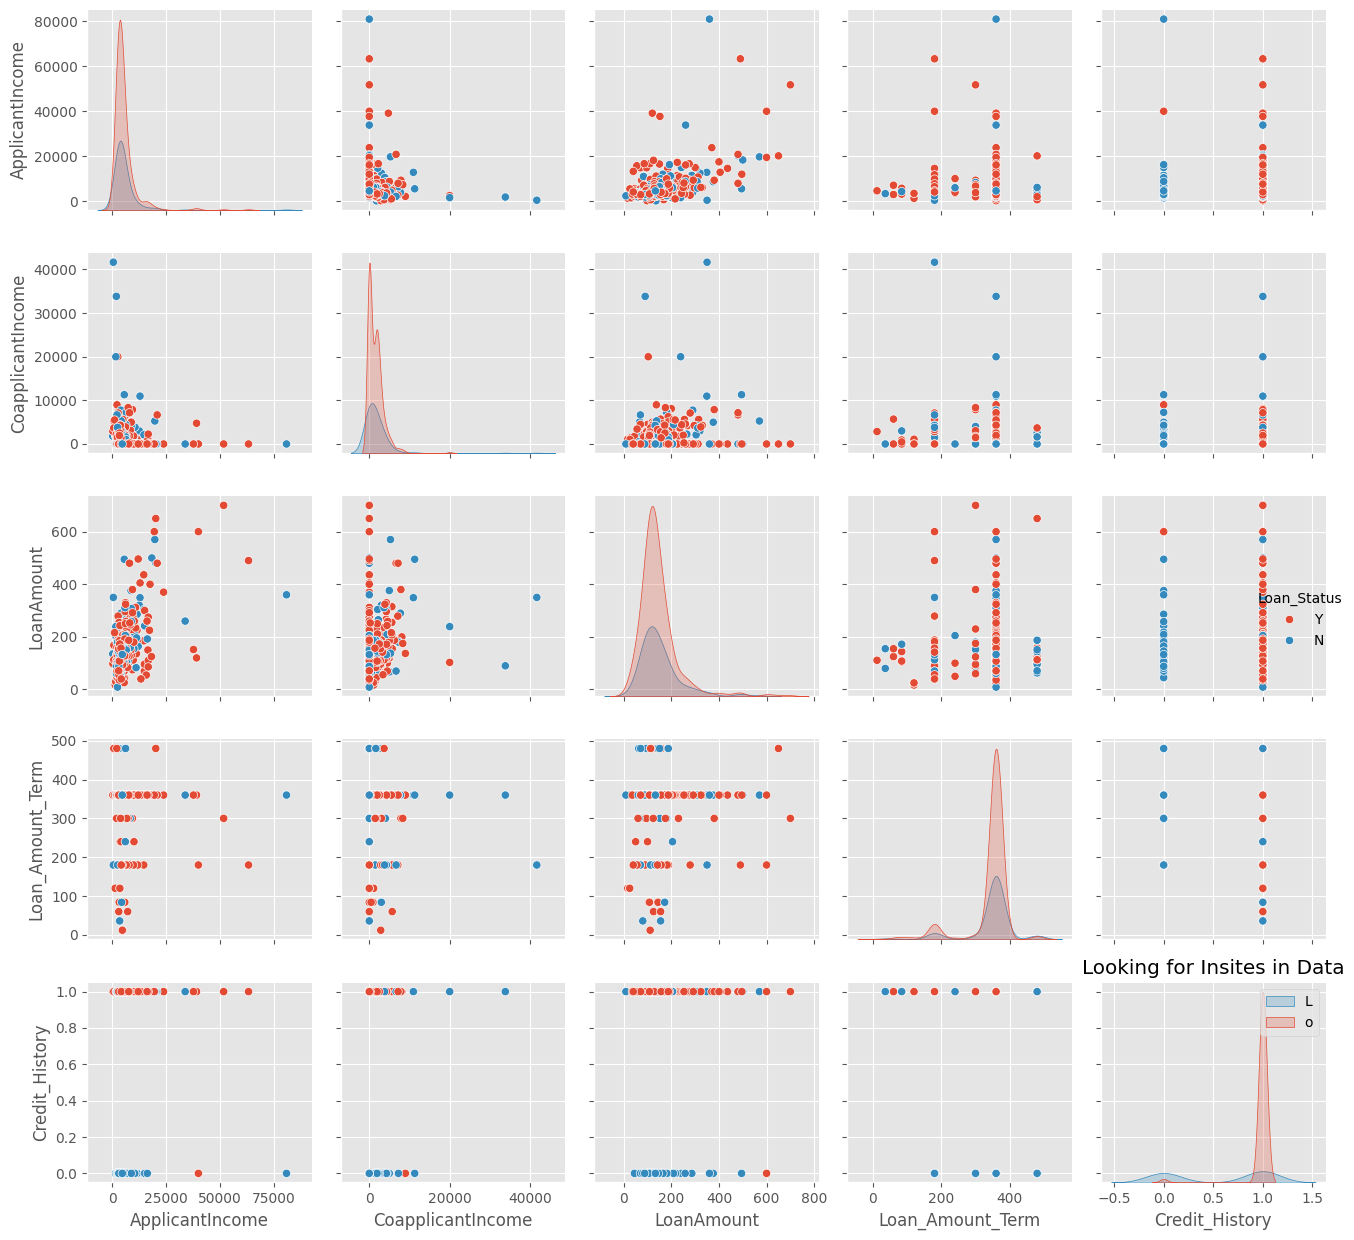

In [14]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="Loan_Status")
plt.title("Looking for Insites in Data")
plt.legend("Loan_Status")
plt.tight_layout()
plt.plot()

### Helper Functiosn - EDA

In [19]:
#correlation heatmap
def corr_plot(df, target):
    df_c = df.drop(target, axis=1)

    import seaborn as sns
    sns.heatmap(df_c.corr(numeric_only = True))
    plt.show()


#plot histogram - distribution by each columns
def hist_plot(df):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,10))
    for i,col in enumerate(df.columns,1):
        plt.subplot(4,3,i)
        plt.title(f"Distribution of {col} Data")
        sns.histplot(df[col],kde=True)
        plt.tight_layout()
        plt.plot()

#pairplot bivariate - relationship between variables
def pair_plot(df, hue_col=None):

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(15,10))
    if hue_col is not None:
        sns.pairplot(df,hue=hue_col)
        plt.legend(hue_col)
    else:
        sns.pairplot(df)
    plt.tight_layout()
    plt.plot()


#box plot - outlier for each column
def box_plot(df, value_col, by_col=None):

    import matplotlib.pyplot as plt
    if by_col is not None:
        df.boxplot(column=value_col, by=by_col)
    else:
        df.boxplot(column=value_col)
    plt.show()

In [20]:
#missing value

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
drop_col = 'Loan_ID' #not for prediction

In [22]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: Int64

In [23]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: Int64

In [40]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: Int64

In [41]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: Int64

### Some specific case-by-case imputation need to do before doing the regular functionn-defined imputation

In [ ]:
Gender               13    #most frequent
Married               3    #remove due to small amount
Dependents           15    #most frequent
Education             0
Self_Employed        32    #most frequent
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22    #fill with median
Loan_Amount_Term     14    #fill with median
Credit_History       50    #to be conservatiive, fill out with 0
Property_Area         0
Loan_Status           0

### Helper Functions Data Clearning

In [68]:
#seperate columns by type

def col_type(df, target):
    cat_cols = df.select_dtypes(include='object').columns
    # df[str_cols] = df[str_cols].astype('string')

    target = target
    num_cols = list(set(all_cols) - set(cat_cols) - set([target]))

    print(f"categorical columns are {cat_cols} \n")
    print(f"target columns are {target} \n")
    print(f"numerical columns are {num_cols}")

    return cat_cols, num_cols, target


#impute missing values
def impute_missing(df, target, drop_cols, num_fill=False, cat_fill=False):

    #fillna with median/mean values for numerical cols
    cat_cols, num_cols, target = col_type(df, target)
    if num_fill == True:
        df[num_cols] = df[num_cols].fillna(df[num_cols].median())
        # df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

    #fillna with most frequent values for categorical cols
    if cat_fill == True:
        df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

    #first drop all columns that will not be used for modelling for various reason
    if drop_cols is not None:
        df = df.drop(drop_cols, axis=1)

    #by defaul, drop all rows with missing values
    df = df.dropna(axis=0)

    return df

#### **Distance algorithms (Need scaling)** like "Logistic Regression", ""KNN", "K-means" and "SVM" are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity. Whem two features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.

#### **Tree-based algorithms (Not Need Scaling)**, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.

##### Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

##### Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

##### Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

In [69]:
#feature scaling function
#use it when using distance-based algorithms (e.g. KNN, K-means, SVM)

from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
def scale(df_train, df_test):
    scaler = MinMaxScaler()
    # scaler = RobustScaler()
    x_train = scaler.fit_transform(df_train)
    x_test = scaler.transform(df_test)

    return x_train, x_test


####For **not Tree based - One hot** Machine Learning Algorithms the best way to go will be to use One-Hot Encoding

####One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space.
####The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature

####For **Tree based Machine Learning Algorithms the best way to go is with Label Encoding**

####LabelEncoder can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

In [70]:
def cat_encoding(df, tree=True):

    from sklearn.preprocessing import LabelEncoder

    cat_cols, num_cols, target = col_type(df, 'HeartDisease')
    if tree==False:
       df_encode = pd.get_dummies(df, columns=cat_cols, drop_first=False)
    df_encode = df.apply(LabelEncoder().fit_transform)

    return df_encode

In [96]:
## data_prep aggregation function

def data_prep_tree(df, target):

    target = target
    drop_cols = ['Loan_ID']

    y = df[target].apply(lambda x: 1 if x=='N' else 0) #added given the target variable values are 'Y' and 'N'
    df_x = df.drop(target, axis=1)
    df_x = impute_missing(df_x, target, drop_cols, num_fill=True, cat_fill=True)
    df_x = cat_encoding(df_x, tree=True)

    df = pd.concat([df_x, y], axis=1)
    return df


def data_prep_notree(df, target):

    target = target
    drop_cols = ['Loan_ID']

    y = df[target].apply(lambda x: 1 if x=='N' else 0) #added given the target variable values are 'Y' and 'N'
    df_x = df.drop(target, axis=1)
    df_x = impute_missing(df_x, target, drop_cols, num_fill=True, cat_fill=True)
    df_x = cat_encoding(df_x, tree=False)

    df = pd.concat([df_x, y], axis=1)
    return df

In [63]:
#special treatment due to drop_cols not in the index
# drop_cols = ['Loan_ID']

# df_test = pd.read_csv(os.path.join(path, file_train))
# df = df.drop(drop_cols, axis = 1)

# file_test = "loan_sanction_test.csv"

# df_test = pd.read_csv(os.path.join(path, file_test))
# df_test = df_test.drop(drop_cols, axis=1)

In [74]:
df_see = data_prep_notree(df, 'Loan_Status')
df_see.head()

categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,81,8,1,2,0
1,1,1,1,1,0,0,306,60,81,8,1,0,1
2,2,1,1,0,0,1,139,0,26,8,1,2,0
3,3,1,1,0,1,0,90,160,73,8,1,2,0
4,4,1,0,0,0,0,381,0,94,8,1,2,0


In [95]:
df_see.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Training with K-fold Cross Validation

#### Non-tree based algorithme traing (algorithm model as plug-in kit

In [75]:
#train with scaling (Logistic)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, f1_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.inspection import permutation_importance


def notree_train(df, target, model):

    result=[]

    df_1 = data_prep_notree(df, target) #df here need to include target as a column
    x_cols = list(set(df_1.columns) - set([target])) #target need to be a list, otherwise data leakage
    y=df_1[target].values #need to pass y, because stratified split need y values as ratio

    kf=model_selection.StratifiedKFold(n_splits=5)
    for fold , (trn_,val_) in enumerate(kf.split(X=df_1,y=y)):

        X_train=df_1.loc[trn_,x_cols]
        y_train=df_1.loc[trn_,target]

        X_valid=df_1.loc[val_,x_cols]
        y_valid=df_1.loc[val_,target]

        #print(pd.DataFrame(X_valid).head())
        ro_scaler=MinMaxScaler()
        X_train=ro_scaler.fit_transform(X_train)
        X_valid=ro_scaler.transform(X_valid)

        #Logistic
        clf=model

        clf.fit(X_train,y_train)

        y_pred=clf.predict(X_valid)
        print(f"The fold is : {fold} : ")
        print(classification_report(y_valid,y_pred))

        acc=roc_auc_score(y_valid,y_pred)
        f1_score_fold = f1_score(y_valid, y_pred)
        result.append(f1_score_fold)

        print(f"The f1_score for Fold {fold+1} : {f1_score_fold}")

    return result


In [76]:
#logistic regression model
def lr_model():
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    return model

#naive bayes model
def nb_model():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    return model

def svc_model():
    from sklearn.svm import SVC
    model = SVC(kernel="linear")
    #model = SVC(kernel="sigmoid")
    #model = SVC(kernel="rbf")
    #model = SVC(kernel="poly")
    return model

def knn_model():
    from sklearn.neighbors import KNeighborsClassifier
    model=KNeighborsClassifier(n_neighbors=32)
    return model

In [78]:
model = nb_model()
result_nb = notree_train(df, 'Loan_Status', model )


categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.79      0.98      0.87        85
           1       0.89      0.42      0.57        38

    accuracy                           0.80       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.82      0.80      0.78       123

The f1_score for Fold 1 : 0.57

So, when you do K-fold cross validation, you are testing how well your model is able to get trained by some data and then predict data it hasn't seen. We use cross validation for this because if you train using all the data you have, you have none left for testing. You could do this once, say by using 80% of the data to train and 20% to test, but what if the 20% you happened to pick to test happens to contain a bunch of points that are particularly easy (or particularly hard) to predict? We will not have come up with the best estimate possible of the models ability to learn and predict.

We want to use all of the data. So to continue the above example of an 80/20 split, we would do 5-fold cross validation by training the model 5 times on 80% of the data and testing on 20%. We ensure that each data point ends up in the 20% test set exactly once. We've therefore used every data point we have to contribute to an understanding of how well our model performs the task of learning from some data and predicting some new data.

But **the purpose of cross-validation is not to come up with our final model**. We don't use these 5 instances of our trained model to do any real prediction. For that we want to use all the data we have to come up with the best model possible. The purpose of cross-validation is model checking, not model building.

The GaussianNB does not offer an intrinsic method to evaluate feature importances. Naïve Bayes methods work by determining the conditional and unconditional probabilities associated with the features and predict the class with the highest probability. Thus, there are no coefficients computed or associated with the features you used to train the model (compare with its documentation).

That being said, there are methods that you can apply post-hoc to analyze the model after it has been trained. One of these methods is the Permutation Importance and it, conveniently, has also been implemented in scikit-learn

In [80]:
target = 'Loan_Status'

In [81]:
model = lr_model()
result_lr = notree_train(df, target, model )

categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.79      0.99      0.88        85
           1       0.94      0.42      0.58        38

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

The f1_score for Fold 1 : 0.58

In [82]:
model = svc_model()
result_svc = notree_train(df, target, model )

categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.79      0.99      0.88        85
           1       0.94      0.42      0.58        38

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

The f1_score for Fold 1 : 0.58

In [83]:
#decide the best model for notree algorithems
result_dic = {
    'lr': result_lr,
    'nb': result_nb,
    'svc': result_svc
}

result_df = pd.DataFrame(result_dic).T
result_df['avg_f1'] = result_df.mean(axis=1)
result_df

,0,1,2,3,4,avg_f1
lr,0.581818,0.490566,0.509091,0.709677,0.607143,0.579659
nb,0.571429,0.481481,0.509091,0.709677,0.607143,0.575764
svc,0.581818,0.490566,0.509091,0.709677,0.607143,0.579659


In [84]:
#develop the model and find the feature importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def feature_imp(df, target, model):

    df_1 = data_prep_notree(df, target) #df here need to include target as a column
    x_cols = list(set(df_1.columns) - set([target])) #target need to be a list, otherwise data leakage

    X = df_1.loc[:,x_cols]
    y = df_1.loc[:,target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = model
    clf.fit(X_train, y_train)

    #do the final prediction
    y_pred = model.predict(X_test)

    #find feature importance using permutation
    perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)
    feature_names = X.columns  # Replace with your actual feature names
    perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
    sorted_perm_importance = perm_importance_df.sort_values(by='Importance', ascending=True)
    print(sorted_perm_importance)

    #plot
    plt.barh(sorted_perm_importance['Feature'], sorted_perm_importance['Importance'])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance via Permutation')
    plt.show()

    return y_pred


categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
              Feature  Importance
0     ApplicantIncome    0.000000
1          Dependents    0.000000
2              Gender    0.000000
3       Property_Area    0.000000
5    Loan_Amount_Term    0.000000
6          LoanAmount    0.000000
7             Married    0.000000
8             Loan_ID    0.000000
9           Education    0.000000
10  CoapplicantIncome    0.000000
11

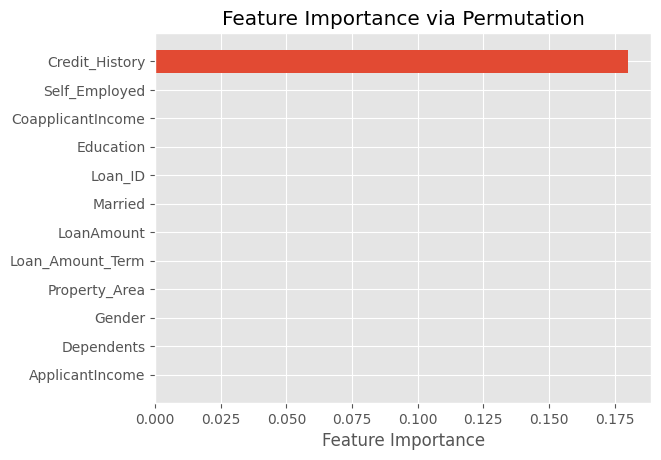

In [86]:
model = svc_model()
y_pred = feature_imp(df, target, model)

### Tree-based classifier

In [97]:
#train without scaling

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, f1_score
from sklearn.inspection import permutation_importance


def tree_train(df, target, model):

    result=[]

    df_1 = data_prep_tree(df, target) #tree - label encoding
    x_cols = list(set(df_1.columns) - set([target])) #target need to be a list, otherwise data leakage
    y=df_1[target].values #need to pass y, because stratified split need y values as ratio

    kf=model_selection.StratifiedKFold(n_splits=5)
    for fold , (trn_,val_) in enumerate(kf.split(X=df_1,y=y)):

        X_train=df_1.loc[trn_,x_cols]
        y_train=df_1.loc[trn_,target]

        X_valid=df_1.loc[val_,x_cols]
        y_valid=df_1.loc[val_,target]

        #print(pd.DataFrame(X_valid).head())
        # ro_scaler=MinMaxScaler()
        # X_train=ro_scaler.fit_transform(X_train)
        # X_valid=ro_scaler.transform(X_valid)

        #Logistic
        clf=model

        clf.fit(X_train,y_train)

        y_pred=clf.predict(X_valid)
        print(f"The fold is : {fold} : ")
        print(classification_report(y_valid,y_pred))

        acc=roc_auc_score(y_valid,y_pred)
        f1_score_fold = f1_score(y_valid, y_pred)
        result.append(f1_score_fold)

        print(f"The f1_score for Fold {fold+1} : {f1_score_fold}")

    return result

In [98]:
#random forest model
def rft_model():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=200,criterion="entropy")
    return model

#xgboost model
def xgb_model():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    return model

#lightGBM
def lgb_model():
    import lightgbm as lgb
    model = lgb.LGBMClassifier()
    return model

In [99]:
model = rft_model()
result_rft = tree_train(df, target, model)

categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'Loan_ID', 'CoapplicantIncome']
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        85
           1       0.77      0.45      0.57        38

    accuracy                           0.79       123
   macro avg       0.78      0.69      0.71       123
weighted avg       0.79      0.79      0.77       123

The f1_score for Fold 1 : 0.56

In [101]:
model = xgb_model()
result_xgb = tree_train(df, target, model )

categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'Loan_ID', 'CoapplicantIncome']
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        85
           1       0.61      0.53      0.56        38

    accuracy                           0.75       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.74      0.75      0.74       123

The f1_score for Fold 1 : 0.56

In [102]:
model = lgb_model()
result_lgb = tree_train(df, target, model )

categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'Loan_ID', 'CoapplicantIncome']
[LightGBM] [Info] Number of positive: 154, number of negative: 337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the tra

In [103]:
#decide the best model for notree algorithems
result_dic = {
    'rft': result_rft,
    'xgb': result_xgb,
    'lgb': result_lgb
}

result_df = pd.DataFrame(result_dic).T
result_df['avg_f1'] = result_df.mean(axis=1)
result_df

,0,1,2,3,4,avg_f1
rft,0.566667,0.464286,0.526316,0.695652,0.600000,0.570584
xgb,0.563380,0.539683,0.584615,0.693333,0.584615,0.593125
lgb,0.529412,0.526316,0.545455,0.693333,0.588235,0.576550


In [104]:
#develop the model and find the feature importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def feature_imp_tree(df, target, model):

    df_1 = data_prep_tree(df, target) #df here need to include target as a column
    x_cols = list(set(df_1.columns) - set([target])) #target need to be a list, otherwise data leakage

    X = df_1.loc[:,x_cols]
    y = df_1.loc[:,target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = model
    clf.fit(X_train, y_train)

    #do the final prediction
    y_pred = model.predict(X_test)

    #find feature importance using permutation
    importance = clf.feature_importances_
    feature_names = X.columns  # Replace with your actual feature names
    perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    sorted_perm_importance = perm_importance_df.sort_values(by='Importance', ascending=True)
    print(sorted_perm_importance)

    #plot
    plt.barh(sorted_perm_importance['Feature'], sorted_perm_importance['Importance'])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance')
    plt.show()

    return y_pred

categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'Loan_ID', 'CoapplicantIncome']
              Feature  Importance
0     ApplicantIncome    0.041368
2              Gender    0.041476
1          Dependents    0.048922
10      Self_Employed    0.051685
7             Married    0.053111
3       Property_Area    0.053201
9   CoapplicantIncome    0.053504
6          LoanAmount    0.053551
8           Education    0.064706
5    Loan_Amount_Term    0.083046
4 

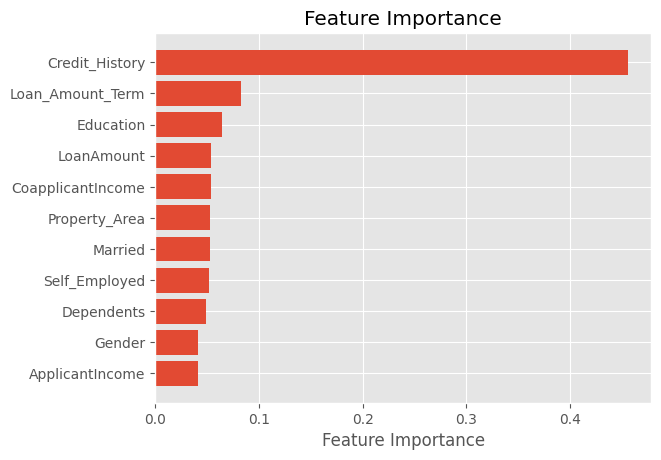

In [106]:
model = xgb_model()
y_pred = feature_imp_tree(df, target, model)

categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'Loan_ID', 'CoapplicantIncome']
              Feature  Importance
10      Self_Employed    0.019785
2              Gender    0.021820
8           Education    0.025160
7             Married    0.025248
5    Loan_Amount_Term    0.051791
3       Property_Area    0.052142
1          Dependents    0.052310
9   CoapplicantIncome    0.127358
6          LoanAmount    0.196838
4      Credit_History    0.212982
0 

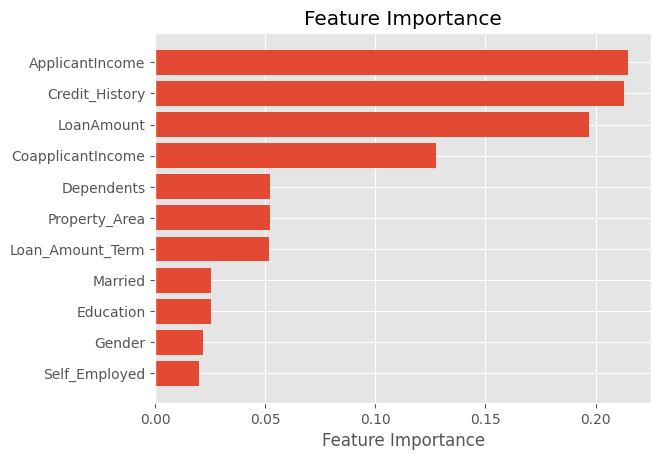

In [108]:
model = rft_model()
y_pred = feature_imp_tree(df, target, model)

categorical columns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object') 

target columns are Loan_Status 

numerical columns are ['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']
categorical columns are Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object') 

target columns are HeartDisease 

numerical columns are ['ApplicantIncome', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'Loan_ID', 'CoapplicantIncome']
[LightGBM] [Info] Number of positive: 149, number of negative: 342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the tra

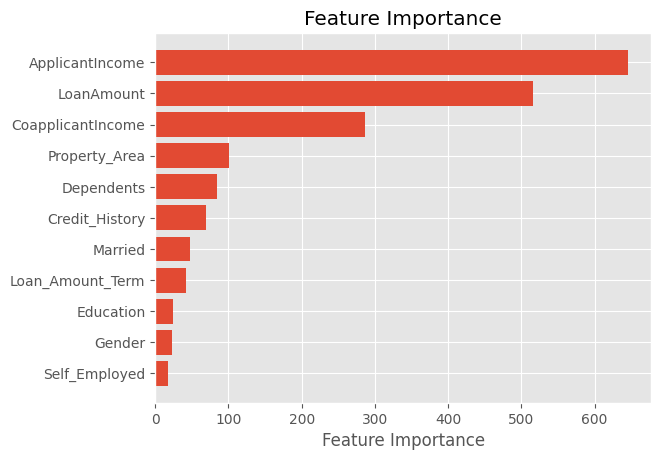

In [109]:
model = lgb_model()
y_pred = feature_imp_tree(df, target, model)